In [1]:
import matplotlib.pyplot as plt

In [2]:
import itertools
import os

In [3]:
import numpy as np

In [4]:
from typing import List

In [5]:
def plot_throughput(no_cache_throughput, throughput: List[float], param, ax: plt.Axes):
    ax.set_title("Throughput (cache_ratio={} max_staleness={} delay_epoch={} delay_iter={})".format(*param))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Throughput (samples/s)")
    ax.plot(no_cache_throughput, label="w/o node embedding cache")
    ax.plot(throughput, label="w/ node embedding cache")
    delay_epoch = param[-1]
    ax.axvline(x=delay_epoch, color='r', linestyle='--')
    ax.set_xlim((0, 9))
    ax.set_xticks(range(0, 10))
    ax.grid(axis='y')
    ax.legend()


def plot_vals(no_cache_vals, vals: List[float], param, ax: plt.Axes):
    ax.set_title("Val AP (cache_ratio={} max_staleness={} delay_epoch={} delay_iter={})".format(*param))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Val AP")
    ax.plot(no_cache_vals, label="w/o node embedding cache")
    ax.plot(vals, label="w/ node embedding cache")
    delay_epoch = param[-2]
    ax.axvline(x=delay_epoch, color='r', linestyle='--')
    ax.set_xlim((0, 9))
    ax.set_xticks(range(0, 10))
    ax.set_ylim((0.8, 1))
    ax.grid(axis='y')
    ax.legend()


(0.2, 1800, 0, 0) 0.374824008118181
(0.2, 1800, 0, 50) 0.3942249311151381
(0.2, 1800, 0, 100) 0.41166549468572144
(0.2, 1800, 1, 0) 0.3872383982344829
(0.2, 1800, 1, 50) 0.4103421987652931
(0.2, 1800, 1, 100) 0.43139064607347827
(0.2, 1800, 2, 0) 0.3865807473626888
(0.2, 1800, 2, 50) 0.4100888793525283
(0.2, 1800, 2, 100) 0.43099094706682556
(0.2, 3600, 0, 0) 0.4953413226318372
(0.2, 3600, 0, 50) 0.5067861591528879
(0.2, 3600, 0, 100) 0.516398881413232
(0.2, 3600, 1, 0) 0.5040686504657119
(0.2, 3600, 1, 50) 0.5193575136725209
(0.2, 3600, 1, 100) 0.5327988250448433
(0.2, 3600, 2, 0) 0.5035999466058227
(0.2, 3600, 2, 50) 0.5191754317386603
(0.2, 3600, 2, 100) 0.5325074231361077
(0.4, 1800, 0, 0) 0.6780953574683513
(0.4, 1800, 0, 50) 0.682019971121823
(0.4, 1800, 0, 100) 0.6853481845625679
(0.4, 1800, 1, 0) 0.7190905270499418
(0.4, 1800, 1, 50) 0.7293657195062085
(0.4, 1800, 1, 100) 0.7345491878317613
(0.4, 1800, 2, 0) 0.7199315187810832
(0.4, 1800, 2, 50) 0.7289298362271702
(0.4, 1800, 2

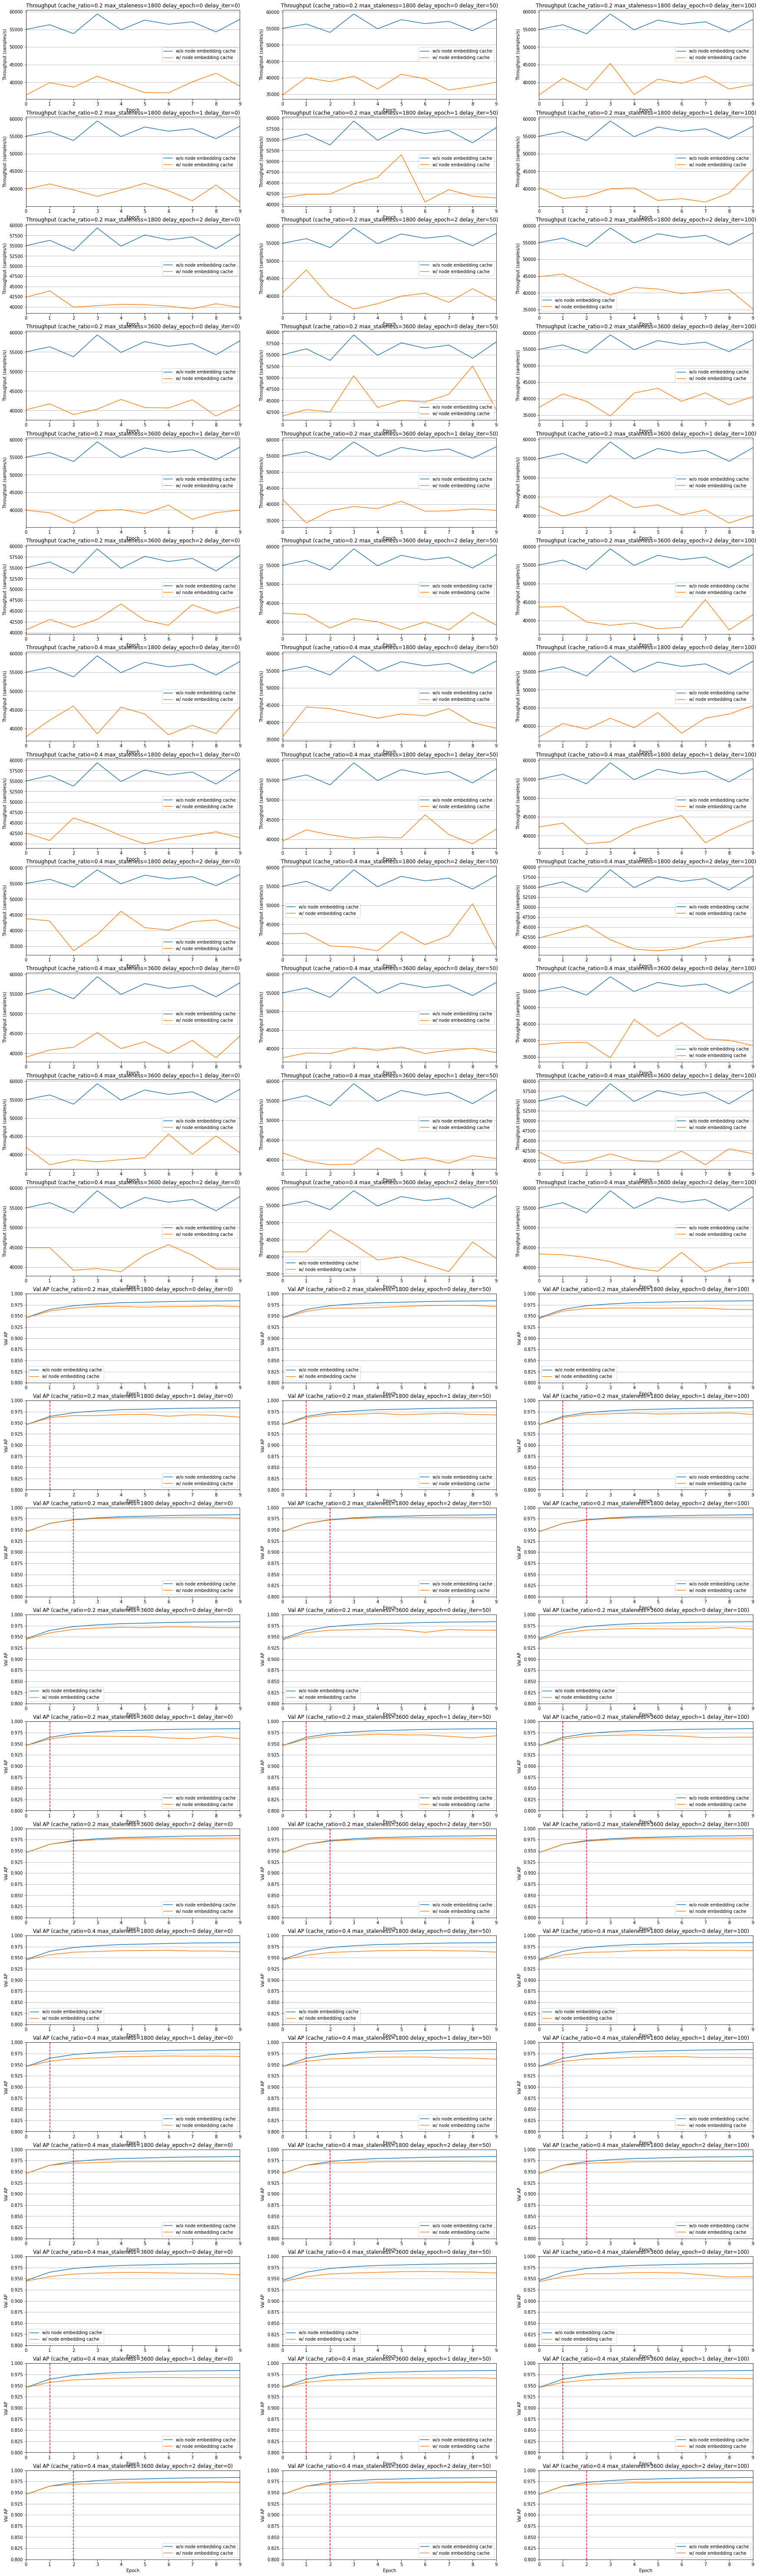

In [7]:
cache_ratio = [0.2, 0.4]
max_staleness = [1800, 3600]
delay_epoch = [0, 1, 2]
delay_iter = [0]
param_space = list(itertools.product(cache_ratio, max_staleness, delay_epoch, delay_iter))

ncols = 3
nrows = len(param_space) // ncols * 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(30, nrows * 4)

model = 'TGAT'
dataset = 'REDDIT'
i = 0
out_dir = "tmp_res/yczhong_delay_fix/"

file = out_dir+"throughput||model{}||dataset{}||cache_ratio{}||max_staleness{}||delay_epoch{}||delay_iter{}.npy".format(model, dataset, 0.0, 0, 0, 0)
no_cache_throughput = np.load(file)
file = out_dir+"val_ap||model{}||dataset{}||cache_ratio{}||max_staleness{}||delay_epoch{}||delay_iter{}.npy".format(model, dataset, 0.0, 0, 0, 0, 0)
no_cache_vals = np.load(file)

for param in param_space:
    file = out_dir+"throughput||model{}||dataset{}||cache_ratio{}||max_staleness{}||delay_epoch{}||delay_iter{}.npy".format(model, dataset,*param)
    throughput = np.load(file)
    file = out_dir+"val_ap||model{}||dataset{}||cache_ratio{}||max_staleness{}||delay_epoch{}||delay_iter{}.npy".format(model, dataset, *param)
    vals = np.load(file)
    node_embedding_hit_rate = np.load(out_dir+"node_embed_cache_hit_rate||model{}||dataset{}||cache_ratio{}||max_staleness{}||delay_epoch{}||delay_iter{}.npy".format(model, dataset, *param))
    print(param, node_embedding_hit_rate)
    plot_throughput(no_cache_throughput, throughput, param, axes[i//ncols][i%ncols])
    plot_vals(no_cache_vals, vals, param, axes[i//ncols+nrows//2][i%ncols])
    i += 1
plt.savefig(out_dir+"result.png", dpi=400, bbox_inches='tight')